In [1]:
import pandas as pd
import numpy as np

In [2]:
# --- 1) Cargar el dataset ---
df = pd.read_csv("admitidos_uni_no_tec.csv")

print("✅ Dataset cargado correctamente")
print(f"Registros: {df.shape[0]}, Columnas: {df.shape[1]}")

✅ Dataset cargado correctamente
Registros: 6378, Columnas: 90


In [3]:
# === 2. Información general ===
print("=== Información del dataset ===")
print(df.info())
print("\nNúmero de filas y columnas:", df.shape)

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             6378 non-null   object 
 1   PERIODO                           6378 non-null   object 
 2   CAMPUS_UTILIZADO                  6378 non-null   object 
 3   SEDE                              6378 non-null   object 
 4   NACIONALIDAD                      6376 non-null   object 
 5   CLAVE_GENERO                      6376 non-null   object 
 6   DESC_NIVEL_ACAD_SOLICITANTE       6378 non-null   object 
 7   CLAVE_TIPO_ADMISION_TIPO_INGRESO  6378 non-null   object 
 8   AREA                              6378 non-null   object 
 9   CLAVE_MAJOR_PGMA_ACAD             6378 non-null   object 
 10  CLAVE_ESCUELA                     6374 non-null   object 
 11  NOMBRE_ESCUELA                    637

In [4]:
# === 3. Valores faltantes ===
print("\n=== Valores faltantes ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Valores_faltantes': missing, 'Porcentaje': missing_percent})
print(missing_table[missing_table['Valores_faltantes'] > 0].sort_values('Porcentaje', ascending=False))


=== Valores faltantes ===
                               Valores_faltantes  Porcentaje
APORTACION_CAMPUS_TEC                       6378  100.000000
FECHA_SOLICITUD_ADMISION                    3626   56.851678
PUNTAJE_EUC                                  745   11.680778
DESC_ESTADO_ESCUELA                          482    7.557228
DESC_CIUDAD_ESCUELA                          478    7.494512
...                                          ...         ...
CLAVE_GENERO                                   2    0.031358
V_DECISION_FINAL1                              2    0.031358
CLAVE_DECISION_ADMISION_FINAL                  2    0.031358
FECHA_DECISION_ADMISION_FINAL                  2    0.031358
matricula                                      1    0.015679

[67 rows x 2 columns]


In [5]:
# === 4. Estadísticas descriptivas numéricas ===
print("\n=== Estadísticas descriptivas (numéricas) ===")
print(df.describe().T)


=== Estadísticas descriptivas (numéricas) ===
                      count         mean         std  min     25%      50%  \
V_PROM_IND           6378.0    92.745583    5.477723  0.0    90.0    93.75   
V_PAA_IND            6378.0  1286.864221  106.211482  0.0  1211.0  1284.00   
SOLICITUD_INICIADA   6378.0     1.000000    0.000000  1.0     1.0     1.00   
V_PROSPECTO          6378.0     1.000000    0.000000  1.0     1.0     1.00   
V_SOLICITANTE        6378.0     1.000000    0.000000  1.0     1.0     1.00   
...                     ...          ...         ...  ...     ...      ...   
COMITE_NACIONAL_LDM  6363.0     0.000000    0.000000  0.0     0.0     0.00   
V_BECABTE            6363.0     0.005501    0.073967  0.0     0.0     0.00   
V_ANY_BECA           6363.0     0.035989    0.186278  0.0     0.0     0.00   
PRC_BECA_F           6363.0     0.011040    0.070205  0.0     0.0     0.00   
PRC_CREDITO_F        6363.0     0.004943    0.033199  0.0     0.0     0.00   

                

In [6]:
# === 5. Estadísticas descriptivas categóricas ===
print("\n=== Estadísticas descriptivas (categóricas) ===")
cat_cols = df.select_dtypes(include=['object']).columns
print(df[cat_cols].describe().T)


=== Estadísticas descriptivas (categóricas) ===
                                 count unique                       top  freq
FECHA                             6378      1  2024-03-04T00:00:00.000Z  6378
PERIODO                           6378      1                      AD24  6378
CAMPUS_UTILIZADO                  6378     21                 Monterrey  1854
SEDE                              6378     21                       MTY  1854
NACIONALIDAD                      6376     28                  Mexicana  5877
CLAVE_GENERO                      6376      2                         M  3436
DESC_NIVEL_ACAD_SOLICITANTE       6378      1               Profesional  6378
CLAVE_TIPO_ADMISION_TIPO_INGRESO  6378      2                        N5  6375
AREA                              6378      9                       IIT  1721
CLAVE_MAJOR_PGMA_ACAD             6378     58                       NEG   612
CLAVE_ESCUELA                     6374   1941                    H00006   103
NOMBRE_ESCUELA 

In [7]:
# === 6. Revisar valores únicos (cardinalidad) de variables categóricas ===
print("\n=== Cardinalidad de variables categóricas ===")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")


=== Cardinalidad de variables categóricas ===
FECHA: 1 valores únicos
PERIODO: 1 valores únicos
CAMPUS_UTILIZADO: 21 valores únicos
SEDE: 21 valores únicos
NACIONALIDAD: 28 valores únicos
CLAVE_GENERO: 2 valores únicos
DESC_NIVEL_ACAD_SOLICITANTE: 1 valores únicos
CLAVE_TIPO_ADMISION_TIPO_INGRESO: 2 valores únicos
AREA: 9 valores únicos
CLAVE_MAJOR_PGMA_ACAD: 58 valores únicos
CLAVE_ESCUELA: 1941 valores únicos
NOMBRE_ESCUELA: 1853 valores únicos
DESC_CIUDAD_ESCUELA: 481 valores únicos
DESC_MUNICIPIO_ESCUELA: 385 valores únicos
DESC_ESTADO_ESCUELA: 65 valores únicos
DESC_PAIS_ESCUELA: 32 valores únicos
V_TEC_NO_TEC: 1 valores únicos
FECHA_SOLICITUD_ADMISION: 96 valores únicos
FECHA_DECISION_ADMISION_FINAL: 120 valores únicos
PERFIL: 6 valores únicos
CLAVE_DECISION_ADMISION_FINAL: 1 valores únicos
V_DECISION_FINAL1: 1 valores únicos
CAMPUS_APORTACION: 29 valores únicos
ORIGEN_DE_LA_SOLICITUD: 6 valores únicos
DISCIPLINA: 4 valores únicos
TIPO_BECA_F: 4 valores únicos
matricula: 6377 va

In [8]:
# Buscar columnas con un solo valor único
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas que aún son constantes:", const_cols)

# Buscar columnas donde todos los valores son distintos
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

print("Columnas con todos los valores únicos:")
print(unique_cols)
print(f"Total: {len(unique_cols)}")


Columnas que aún son constantes: ['FECHA', 'PERIODO', 'DESC_NIVEL_ACAD_SOLICITANTE', 'SOLICITUD_INICIADA', 'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO', 'V_RECHAZADO', 'PENDIENTE_DE_DECISION', 'V_TEC_NO_TEC', 'CLAVE_DECISION_ADMISION_FINAL', 'V_DECISION_FINAL1', 'ComiteNacional_LDM', 'V_GAN_LDM', 'BECA_LDM', 'V_GANADORBTA', 'BECABTA', 'V_GAN_BTC', 'BECA_BTC', 'V_GAN_BEM', 'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA', 'V_SOL_PERFIL_BTC', 'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES', 'V_GAN_BTT', 'BECA_BTT', 'V_POSSTEAM', 'V_GAN_STEAM', 'BECA_STEAM', 'V_BTA', 'V_LDM', 'COMITE_NACIONAL_LDM', 'NIVEL_N', 'ORIGEN_N']
Columnas con todos los valores únicos:
[]
Total: 0


In [11]:
# === Eliminación de columnas irrelevantes / constantes ===

cols_to_drop = [
    # Constantes
    'FECHA', 'PERIODO', 'DESC_NIVEL_ACAD_SOLICITANTE', 'SOLICITUD_INICIADA',
    'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO', 'V_RECHAZADO',
    'PENDIENTE_DE_DECISION', 'V_TEC_NO_TEC', 'CLAVE_DECISION_ADMISION_FINAL',
    'V_DECISION_FINAL1', 'ComiteNacional_LDM', 'V_GAN_LDM', 'BECA_LDM',
    'V_GANADORBTA', 'BECABTA', 'V_GAN_BTC', 'BECA_BTC', 'V_GAN_BEM',
    'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA', 'V_SOL_PERFIL_BTC',
    'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES', 'V_GAN_BTT',
    'BECA_BTT', 'V_POSSTEAM', 'V_GAN_STEAM', 'BECA_STEAM', 'V_BTA',
    'V_LDM', 'COMITE_NACIONAL_LDM', 'NIVEL_N', 'ORIGEN_N',
    
    # Administrativas
    'FECHA_SOLICITUD_ADMISION', 'FECHA_DECISION_ADMISION_FINAL', 'matricula',
    
    # Alta proporción de nulos
    'APORTACION_CAMPUS_TEC', 'PUNTAJE_EUC', 'DESC_ESTADO_ESCUELA', 'DESC_CIUDAD_ESCUELA',
    
    # Duplicadas o derivadas
    'prcBeca_f', 'prcCredito_f', 'TIPO_BECA_F'
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(f"Columnas eliminadas: {len(cols_to_drop)}")
print(f"Dataset final: {df_clean.shape[1]} columnas, {df_clean.shape[0]} filas")


Columnas eliminadas: 47
Dataset final: 43 columnas, 6378 filas


In [12]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

print("Constantes restantes:", const_cols)
print("Únicas restantes:", unique_cols)


Constantes restantes: []
Únicas restantes: []


In [14]:
# --- Revisar las columnas que quedan ---
print("Columnas restantes después de la limpieza:")
print(df.columns.tolist())

# --- AGRUPAR VARIABLES POR TEMÁTICA ---

# 1️⃣ Académicas
# Quitamos 'PUNTAJE_EUC' porque ya la eliminaste por nulos y no aplica a este dataset.
academic_cols = [col for col in df.columns if col in [
    'V_PROM_IND', 'V_PAA_IND', 'RUBRICA', 'ENSAYO', 'CV'
]]

# 2️⃣ Becas / Socioeconómicas
# Ajustamos el filtro para capturar bien todas las variaciones (‘v_’, ‘V_’, y ‘PRC_’)
# y excluir falsos positivos como 'CAMPUS_APORTACION'.
beca_cols = [
    col for col in df.columns
    if any(x in col.upper() for x in ['BECA', 'CREDITO', 'PRC_BECA'])
    and 'APORTACION' not in col.upper()
]

# 3️⃣ Origen / Demográficas
# Eliminamos 'ORIGEN_N' porque la columna fue descartada previamente por ser constante.
origin_cols = [col for col in df.columns if col in [
    'NACIONALIDAD', 'CLAVE_GENERO', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD'
]]

# 4️⃣ Campus / Institucionales
# Usamos coincidencia parcial más controlada para no incluir columnas no deseadas.
campus_cols = [
    col for col in df.columns
    if any(x in col.upper() for x in ['CAMPUS_', 'SEDE', 'AREA'])
]

# 5️⃣ Variable objetivo
target_col = ['INSCRITO'] if 'INSCRITO' in df.columns else []

# --- Mostrar resumen de clasificación ---
print("\n--- Variables académicas ---")
print(academic_cols)
print("\n--- Variables socioeconómicas / becas ---")
print(beca_cols)
print("\n--- Variables de origen / demográficas ---")
print(origin_cols)
print("\n--- Variables institucionales ---")
print(campus_cols)
print("\n--- Variable objetivo ---")
print(target_col)

# --- Resumen final ---
print("\nResumen de grupos:")
print(f"Académicas: {len(academic_cols)} | Becas: {len(beca_cols)} | Origen: {len(origin_cols)} | Campus: {len(campus_cols)}")


Columnas restantes después de la limpieza:
['CAMPUS_UTILIZADO', 'SEDE', 'NACIONALIDAD', 'CLAVE_GENERO', 'CLAVE_TIPO_ADMISION_TIPO_INGRESO', 'AREA', 'CLAVE_MAJOR_PGMA_ACAD', 'CLAVE_ESCUELA', 'NOMBRE_ESCUELA', 'DESC_MUNICIPIO_ESCUELA', 'DESC_PAIS_ESCUELA', 'V_PROM_IND', 'V_PAA_IND', 'PERFIL', 'IPP', 'INSCRITO', 'CAMPUS_APORTACION', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD', 'RUBRICA', 'ENSAYO', 'CV', 'V_PLDM', 'V_SOL_BSE', 'BECA_SOAF', 'CREDITO_SOAF', 'V_POSTDTA', 'V_POSTULADOBTE', 'v_becadobte', 'BECABTE', 'DISCIPLINA', 'V_POSBCRE', 'BECA_BHP', 'V_POSBEM', 'V_POSBTT', 'V_BHP', 'V_BSE', 'v_anybeca', 'POST_ANYBECA', 'V_BECABTE', 'V_ANY_BECA', 'PRC_BECA_F', 'PRC_CREDITO_F']

--- Variables académicas ---
['V_PROM_IND', 'V_PAA_IND', 'RUBRICA', 'ENSAYO', 'CV']

--- Variables socioeconómicas / becas ---
['BECA_SOAF', 'CREDITO_SOAF', 'v_becadobte', 'BECABTE', 'BECA_BHP', 'v_anybeca', 'POST_ANYBECA', 'V_BECABTE', 'V_ANY_BECA', 'PRC_BECA_F', 'PRC_CREDITO_F']

--- Variables de origen / demográficas ---
['N

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Distribución de INSCRITO:
INSCRITO
1    60.598934
0    39.401066
Name: proportion, dtype: float64


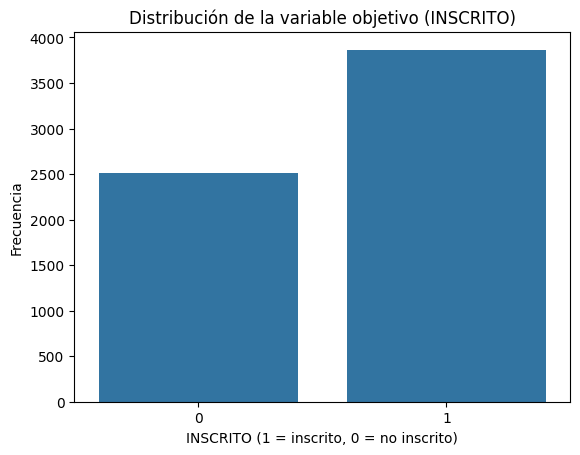

In [16]:
# =====================
# 1. Variable objetivo
# =====================
print("Distribución de INSCRITO:")
print(df['INSCRITO'].value_counts(normalize=True) * 100)

sns.countplot(x='INSCRITO', data=df)
plt.title("Distribución de la variable objetivo (INSCRITO)")
plt.xlabel("INSCRITO (1 = inscrito, 0 = no inscrito)")
plt.ylabel("Frecuencia")
plt.show()


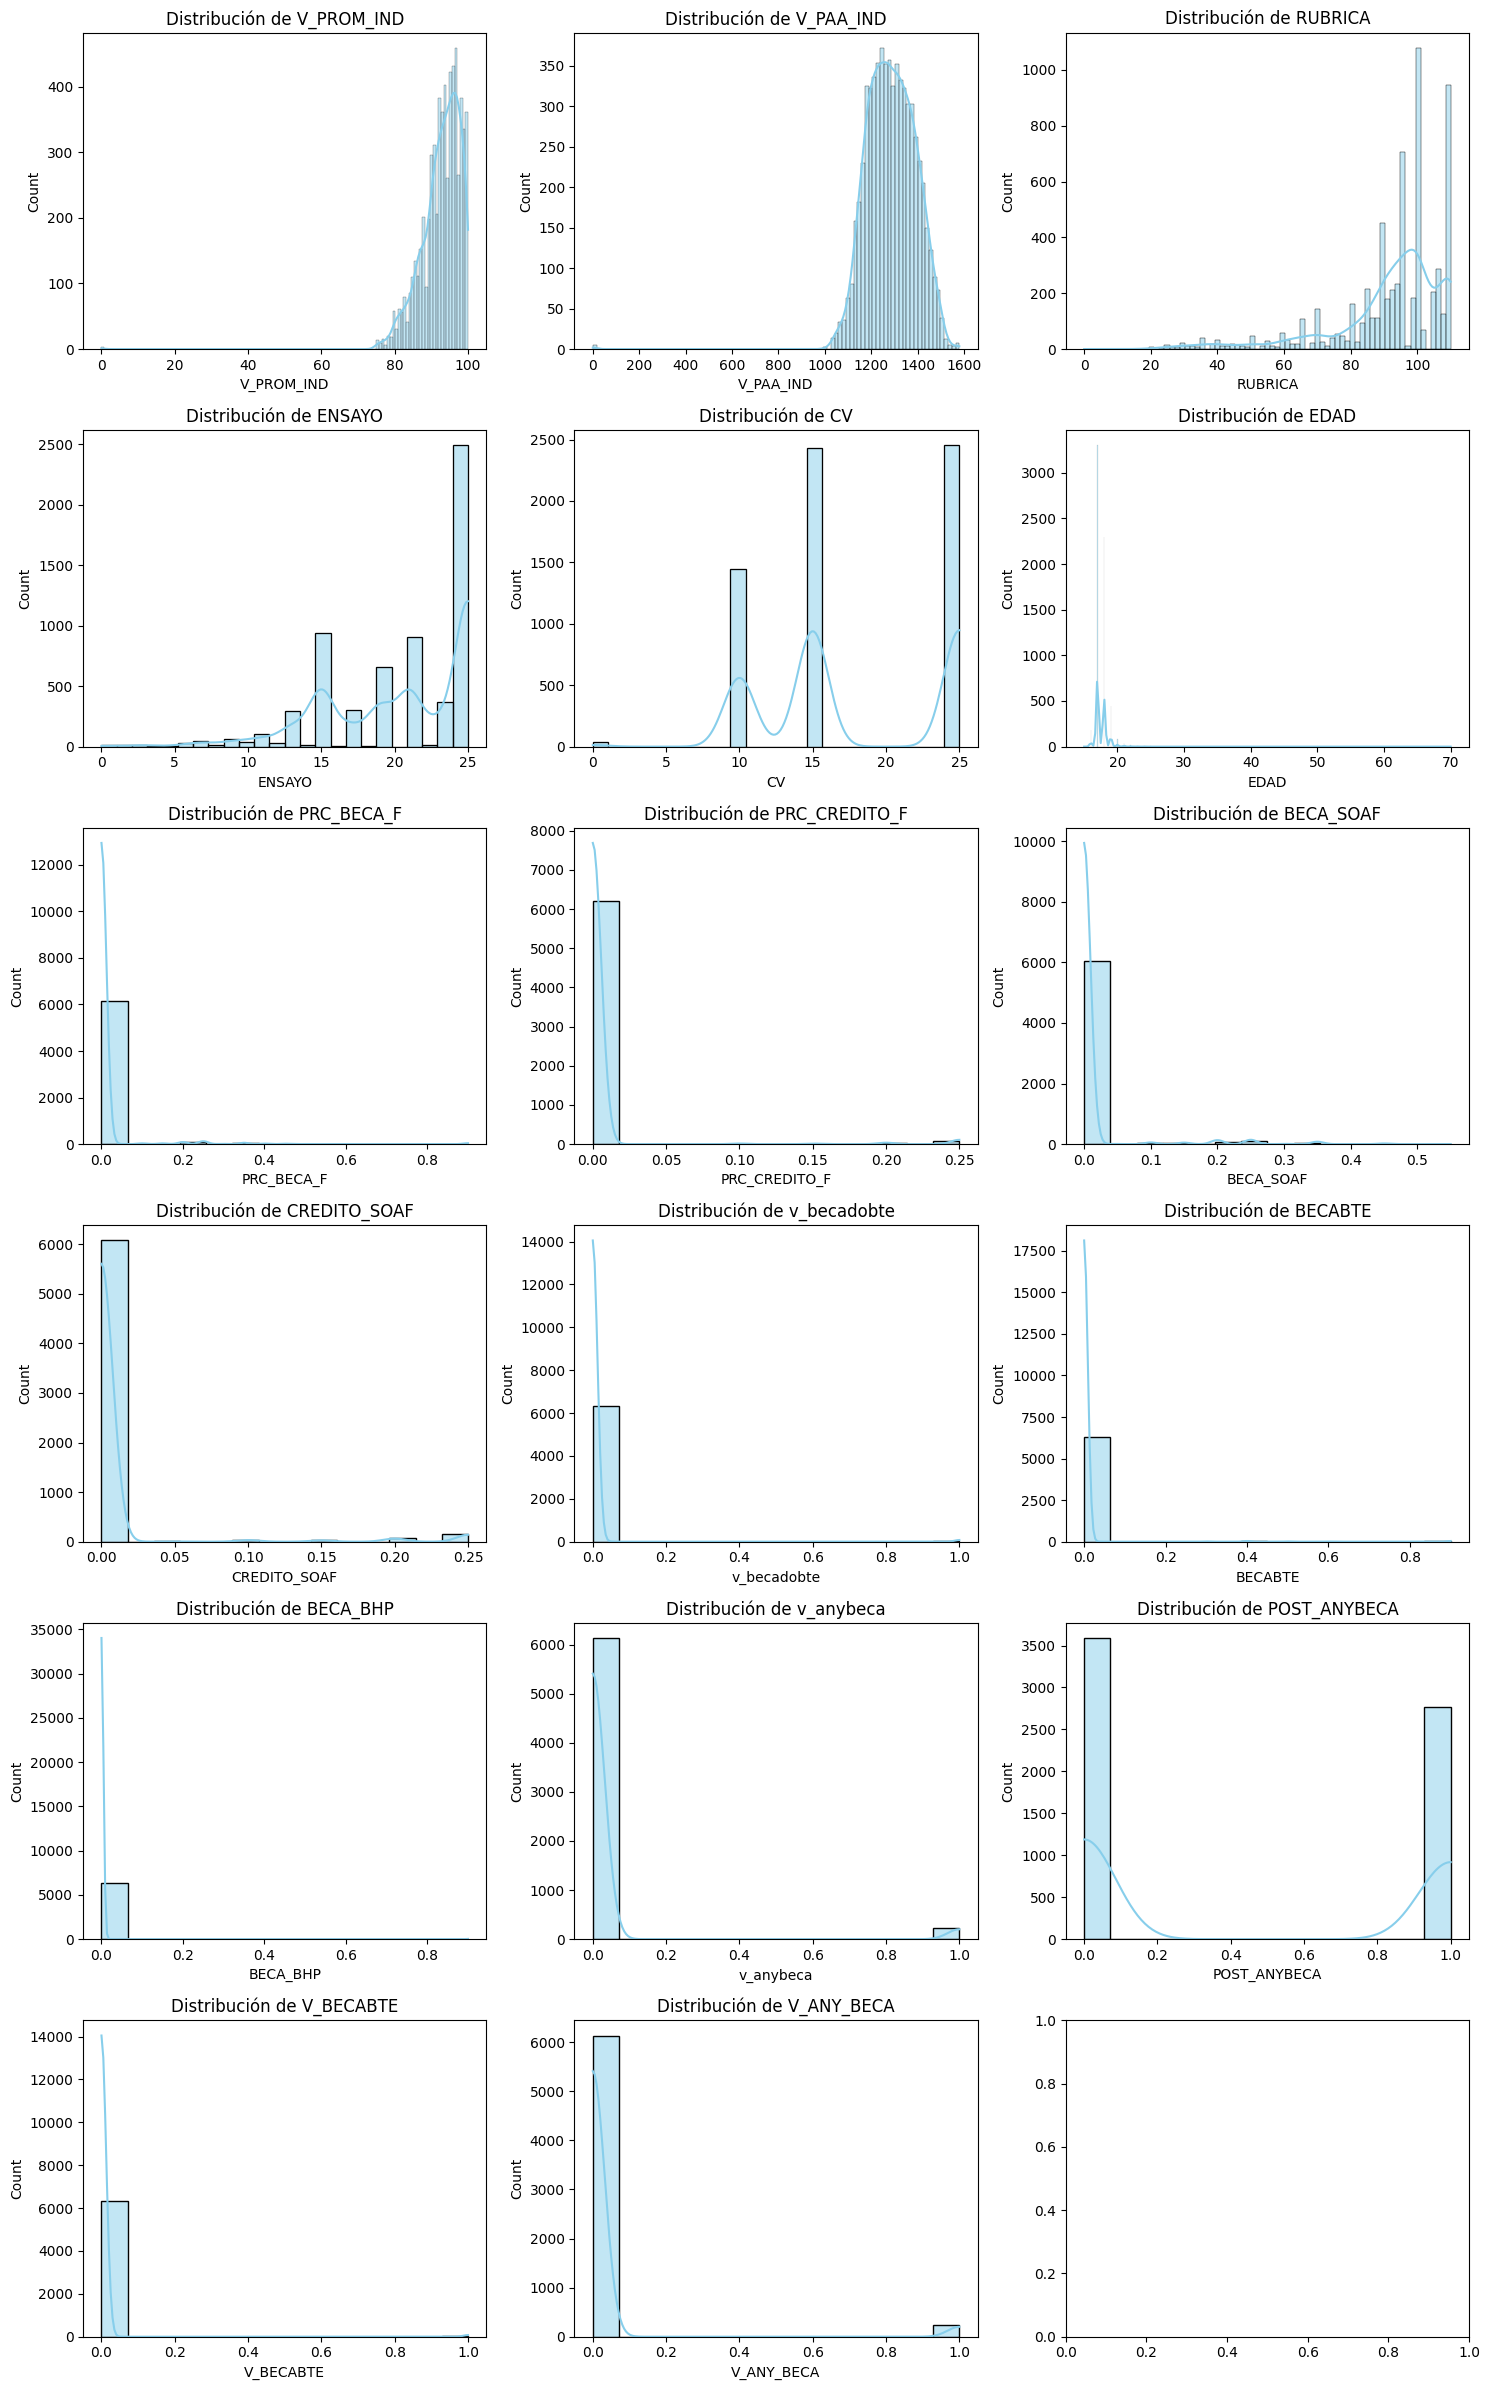

In [19]:
# =====================
# Variables numéricas
# =====================
num_cols = [
    # Académicas
    'V_PROM_IND', 'V_PAA_IND', 'RUBRICA', 'ENSAYO', 'CV',
    
    # Demográficas
    'EDAD',
    
    # Becas y créditos (numéricas o binarias)
    'PRC_BECA_F', 'PRC_CREDITO_F',
    'BECA_SOAF', 'CREDITO_SOAF',
    'v_becadobte', 'BECABTE', 'BECA_BHP',
    'v_anybeca', 'POST_ANYBECA', 'V_BECABTE', 'V_ANY_BECA',
]

# --- 1. Histogramas con KDE ---
n = len(num_cols)
cols = 3  # número de columnas por fila
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribución de {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

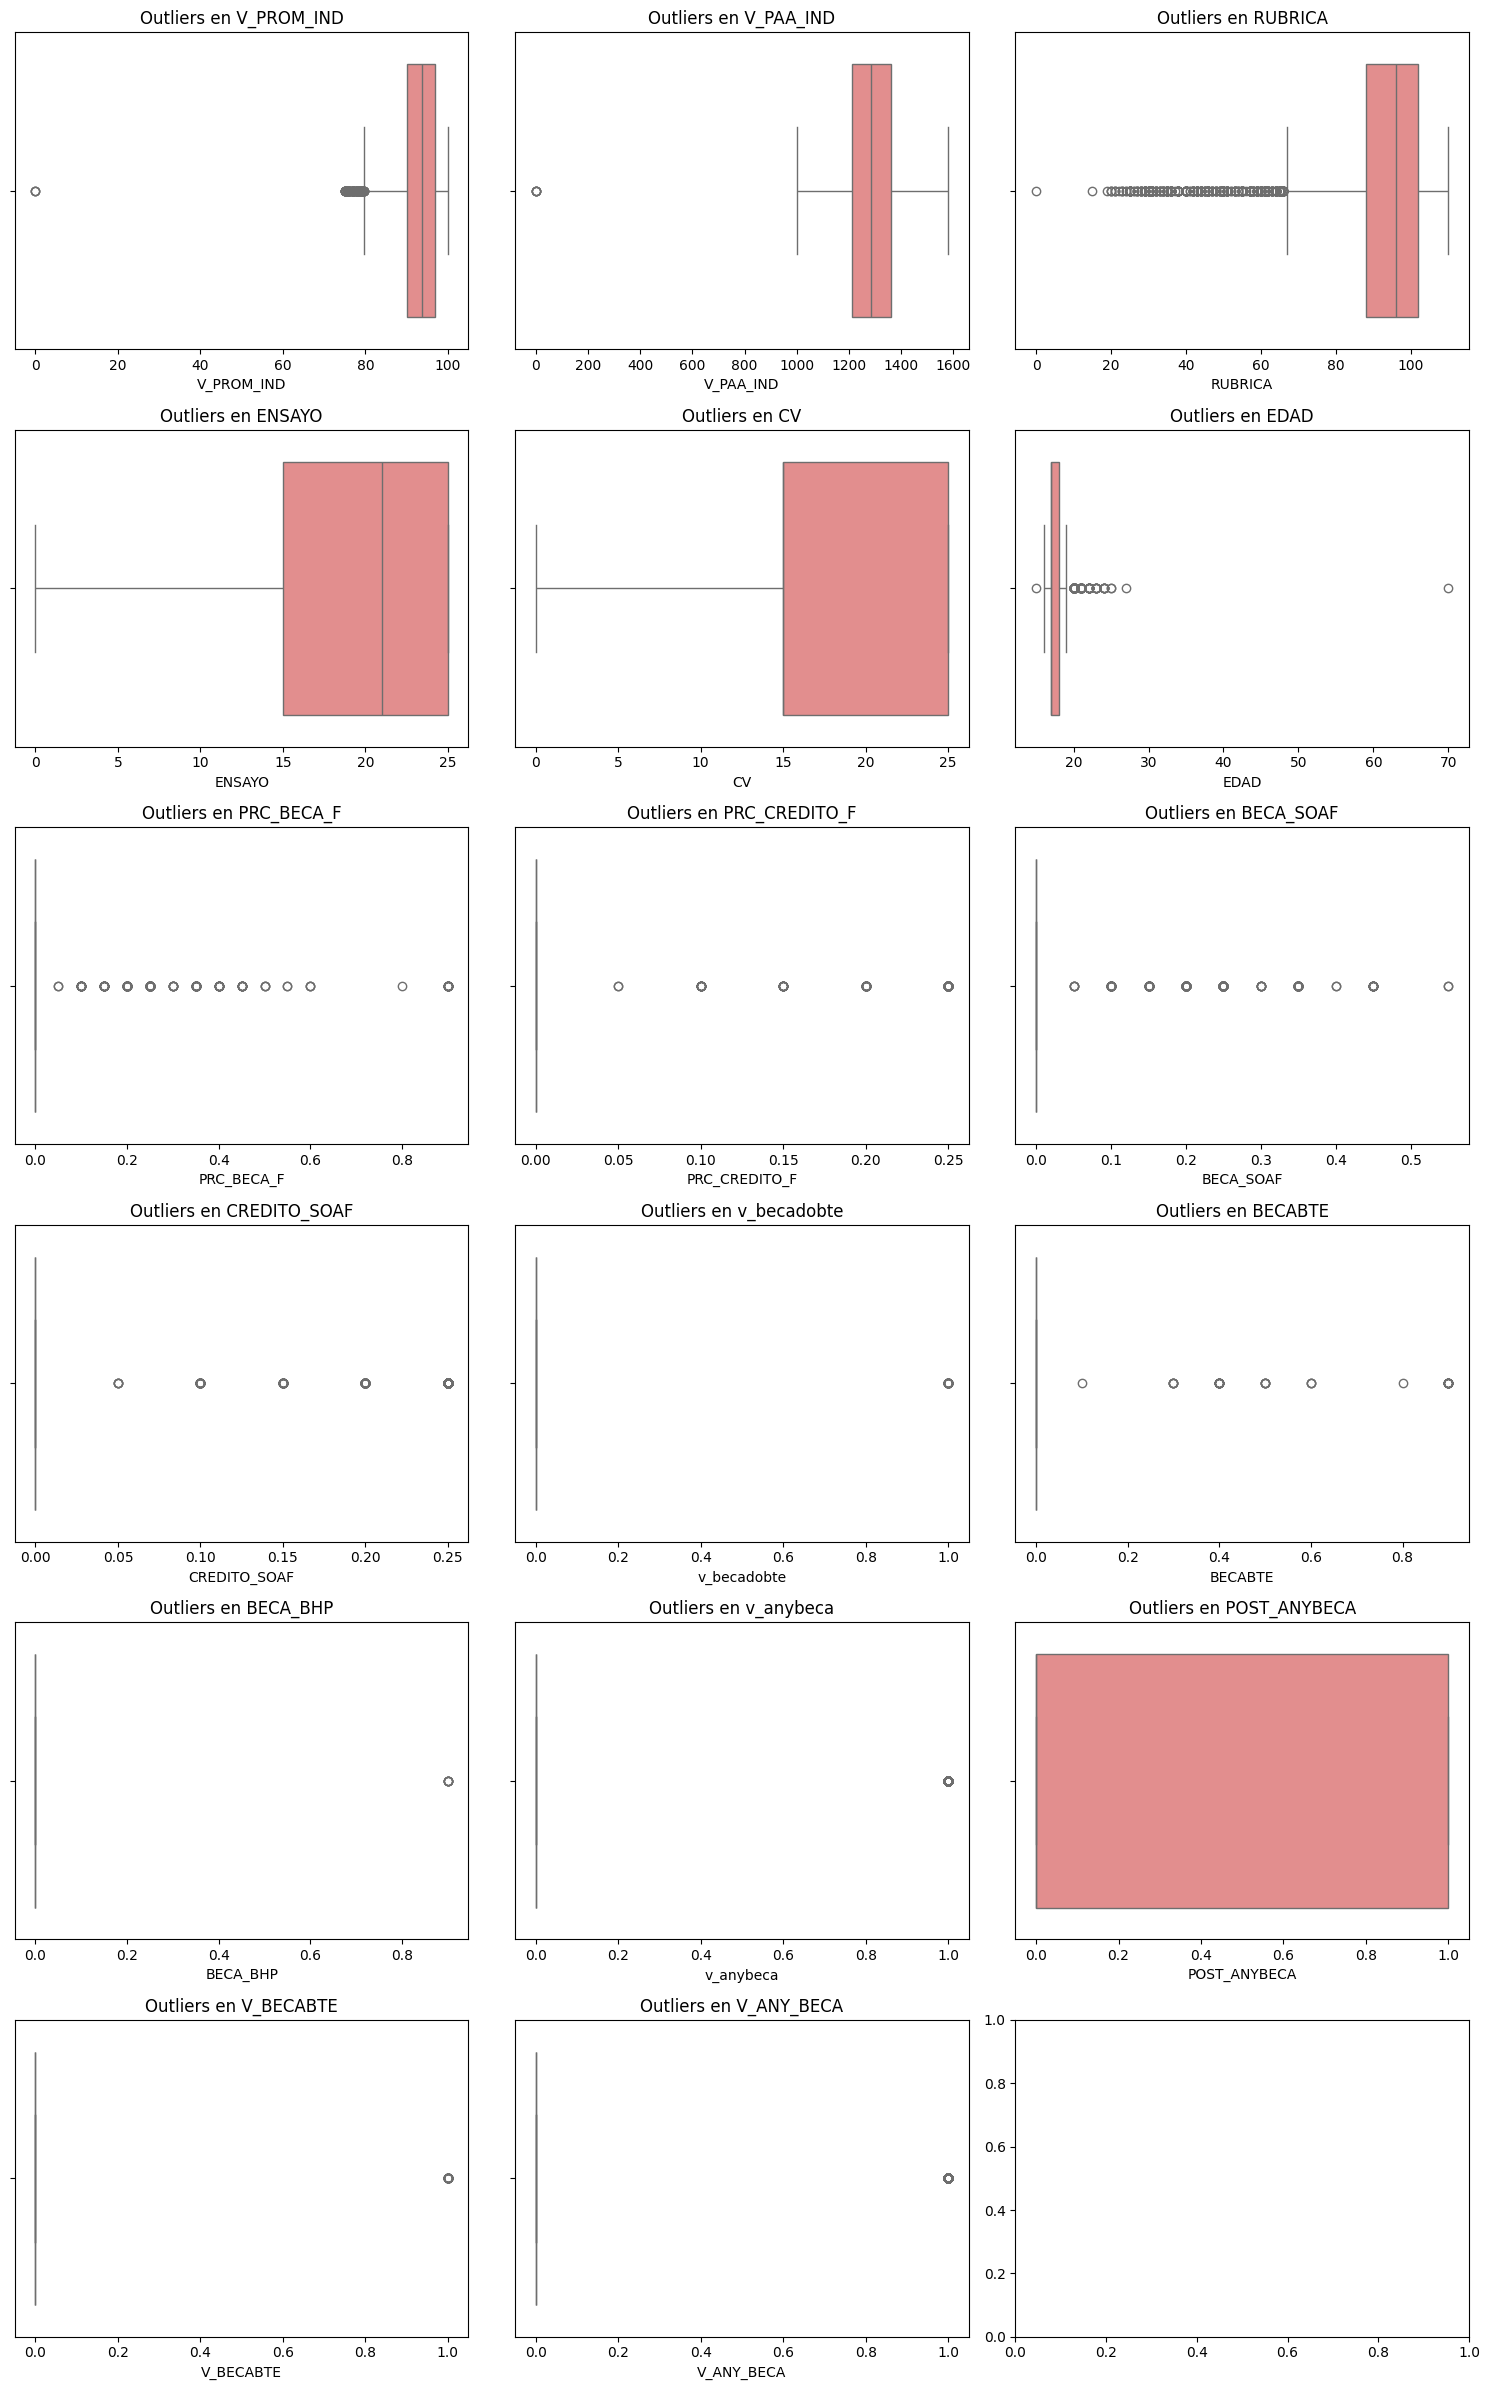

In [20]:
# --- 2. Boxplots ---
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
        axes[i].set_title(f"Outliers en {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


=== Correlaciones con INSCRITO ===
INSCRITO         1.000000
V_PAA_IND        0.235176
POST_ANYBECA     0.195009
V_ANY_BECA       0.132978
v_anybeca        0.132978
CREDITO_SOAF     0.120356
BECA_SOAF        0.119776
PRC_BECA_F       0.112997
PRC_CREDITO_F    0.105237
RUBRICA          0.078375
v_becadobte      0.046776
V_BECABTE        0.046776
ENSAYO           0.044431
BECABTE          0.043586
BECA_BHP         0.024715
EDAD             0.001216
V_PROM_IND      -0.004866
CV              -0.029050
Name: INSCRITO, dtype: float64


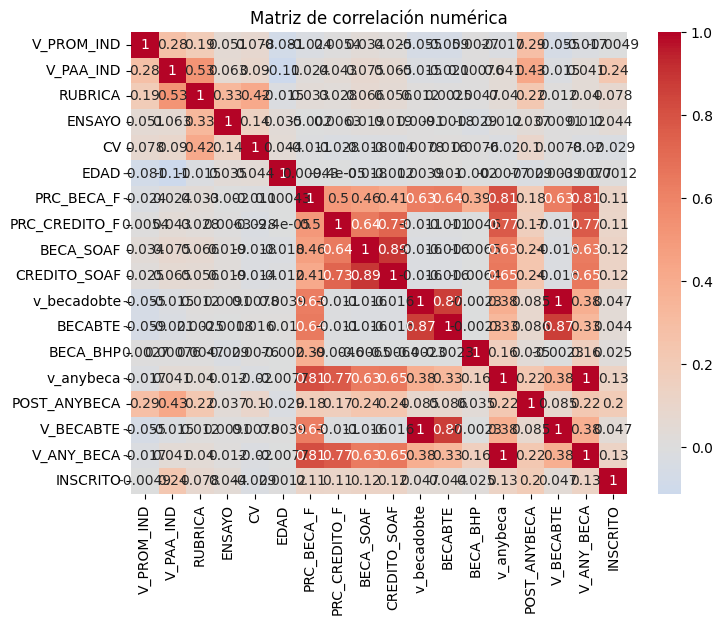

In [21]:
# =====================
# 4. Correlaciones numéricas con INSCRITO
# =====================
corr = df[num_cols + ['INSCRITO']].corr()
print("\n=== Correlaciones con INSCRITO ===")
print(corr['INSCRITO'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación numérica")
plt.show()

/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_44986/2351212337.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_44986/2351212337.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_44986/2351212337.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=co

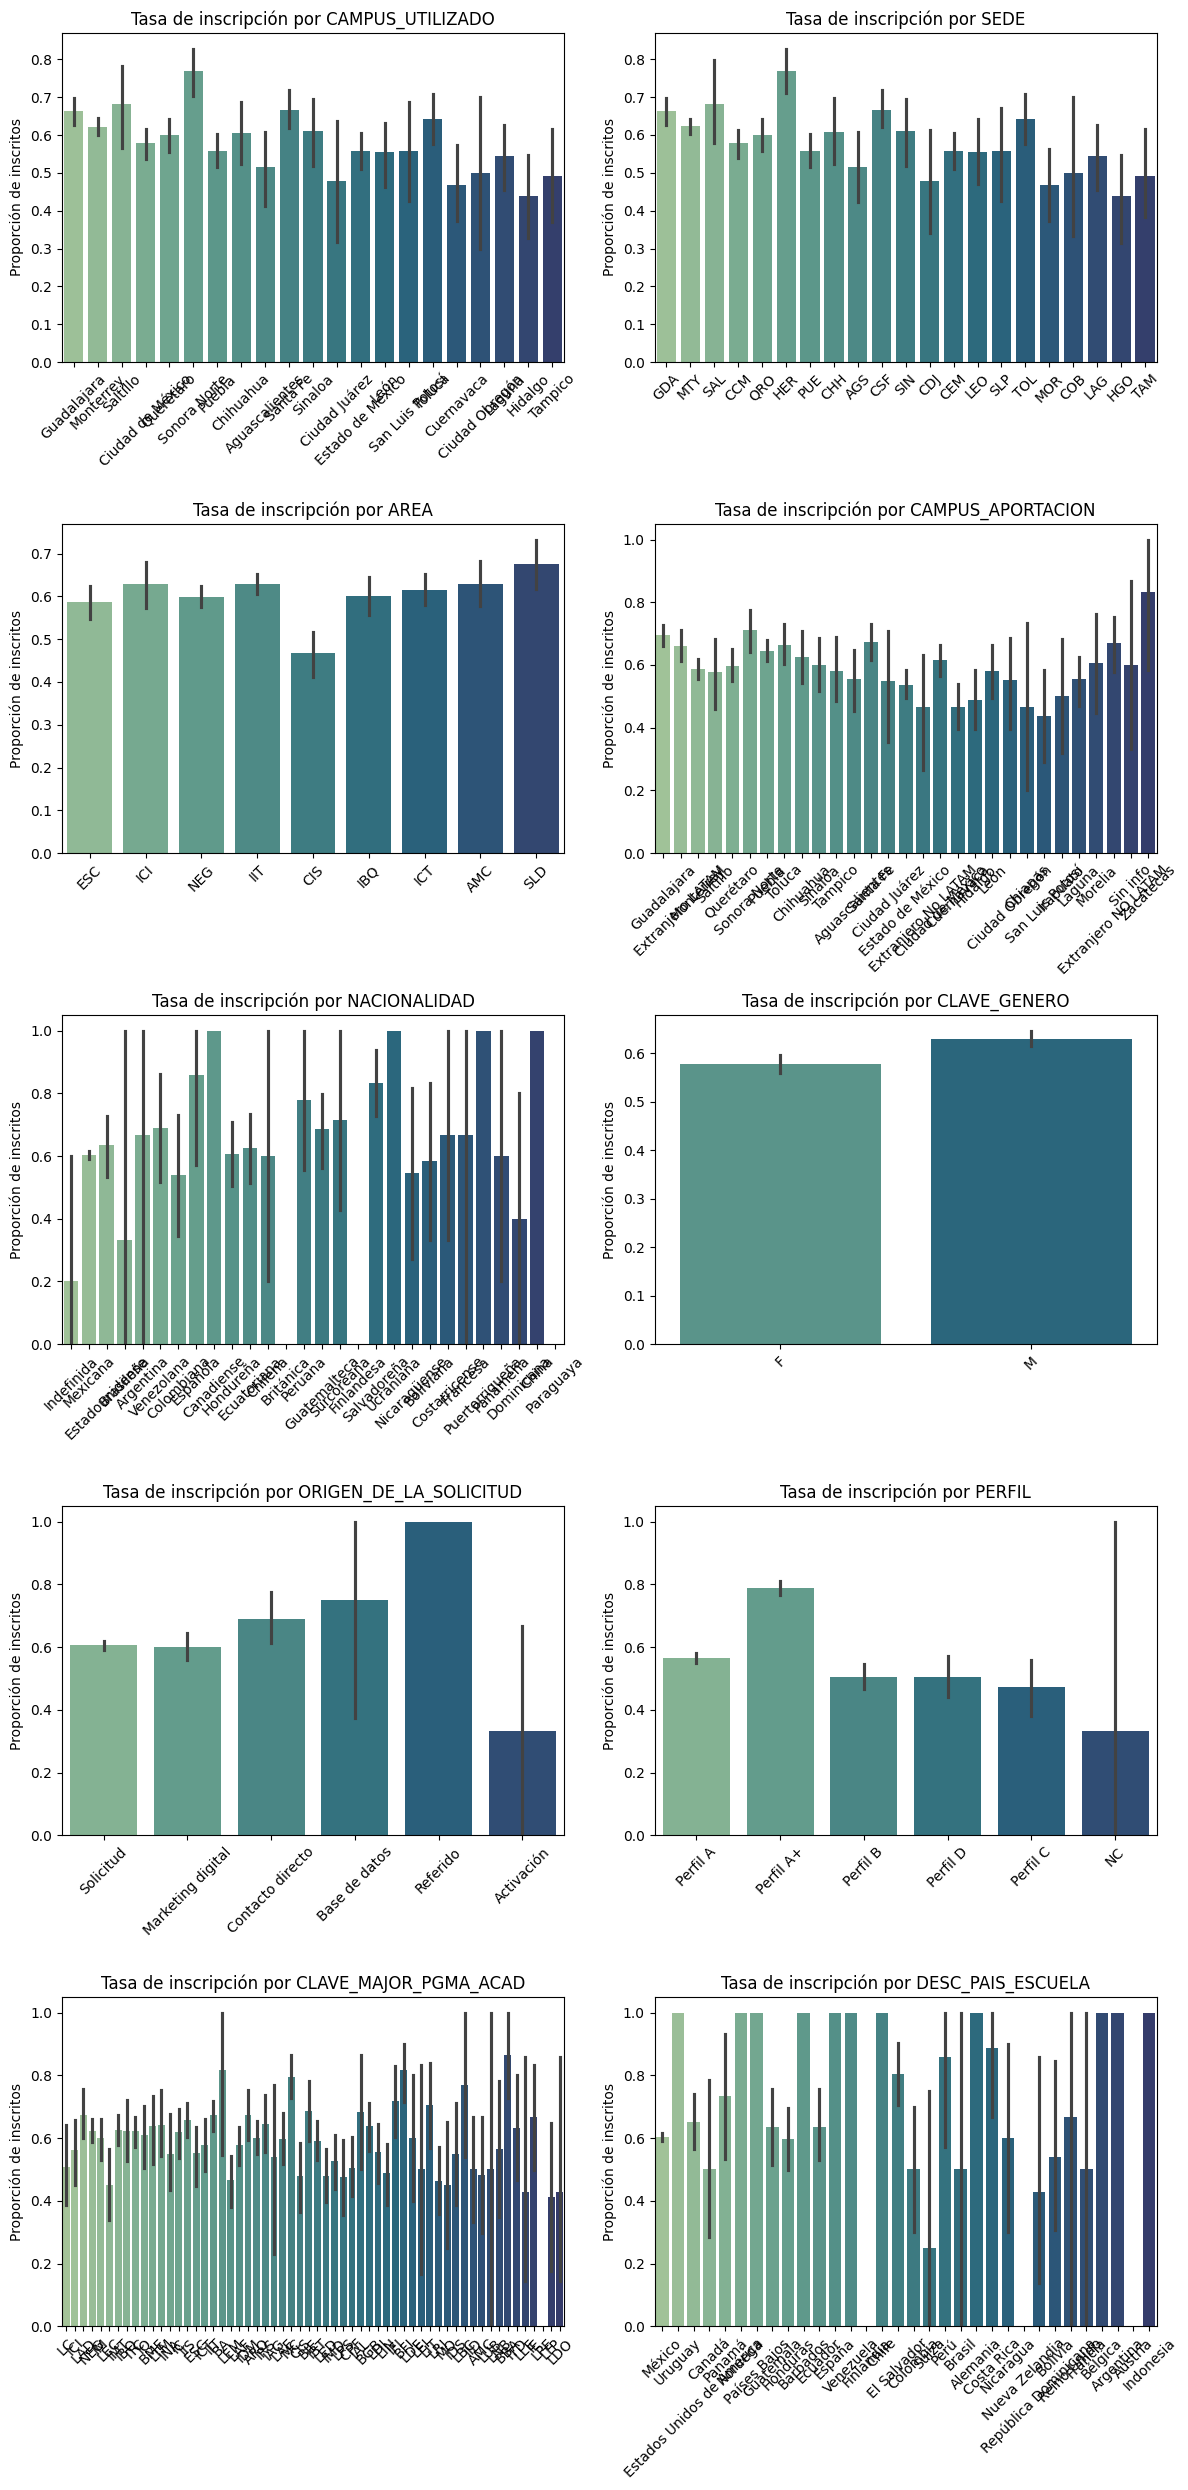

In [22]:
# =====================
# 5. Análisis bivariado con variables categóricas (en grid)
# =====================
cat_cols = [
    # --- Institucionales ---
    'CAMPUS_UTILIZADO', 
    'SEDE', 
    'AREA', 
    'CAMPUS_APORTACION',
    
    # --- Demográficas ---
    'NACIONALIDAD', 
    'CLAVE_GENERO', 
    'ORIGEN_DE_LA_SOLICITUD',
    
    # --- Académico-administrativas ---
    'PERFIL',
    
    # --- Opcional: disciplina / programa / escuela ---
    # (solo si no tienen demasiadas categorías, por ejemplo < 30)
    'CLAVE_MAJOR_PGMA_ACAD',
    'DESC_PAIS_ESCUELA'
]


# Definir tamaño del grid
n = len(cat_cols)
cols = 2  # Número de columnas por fila (ajústalo a 2 o 3 según la cantidad)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if col in df.columns:
        sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
        axes[i].set_title(f"Tasa de inscripción por {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Proporción de inscritos")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [32]:

import numpy as np
import pandas as pd
from math import ceil

df_clean = df.copy()

# 1) Filtros de rango lógico (se aplican solo si la columna existe)
ranges = {
    'EDAD': (14, 25),
    'V_PAA_IND': (400, 1600),
    'V_PROM_IND': (60, 100),
    'RUBRICA': (10, 110),
    'PUNTAJE_EUC': (0, 50),      # si no existe, se ignora
    'PRC_BECA_F': (0, 1),
    'PRC_CREDITO_F': (0, 1),
}

for col, (lo, hi) in ranges.items():
    if col in df_clean.columns:
        df_clean = df_clean[(df_clean[col] >= lo) & (df_clean[col] <= hi)]

# Si V_PAA_IND tiene ceros, márcalos como NaN y decide si quieres eliminarlos
if 'V_PAA_IND' in df_clean.columns:
    df_clean['V_PAA_IND'] = df_clean['V_PAA_IND'].replace(0, np.nan)
    # Opcional: eliminar filas con V_PAA_IND faltante
    # df_clean = df_clean.dropna(subset=['V_PAA_IND'])

# 2) Percentil clipping suave para variables muy sesgadas
for col in ['ENSAYO', 'CV']:
    if col in df_clean.columns:
        lo, hi = df_clean[col].quantile([0.01, 0.99])
        df_clean[col] = np.clip(df_clean[col], lo, hi)

# 3) Eliminar duplicados de porcentaje en minúsculas (conserva las versiones oficiales en mayúsculas)
to_drop_dups = ['prcBeca_f', 'prcCredito_f']
df_clean.drop(columns=[c for c in to_drop_dups if c in df_clean.columns], inplace=True)

# 4) Agrupar categorías con baja frecuencia (sin crear nuevas columnas)
def collapse_rare(series: pd.Series, min_count: int = 30, other_label: str = 'Otros') -> pd.Series:
    vc = series.value_counts(dropna=False)
    keep = set(vc[vc >= min_count].index)
    return series.apply(lambda x: x if x in keep else other_label)

for cat_col in ['NACIONALIDAD', 'CAMPUS_UTILIZADO', 'SEDE', 'AREA']:
    if cat_col in df_clean.columns:
        df_clean[cat_col] = collapse_rare(df_clean[cat_col], min_count=30, other_label='Otros')

# 5) Imputación simple de categóricas (sin crear nuevas features)
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].fillna('Sin dato')

# 6) Verificación posterior
print("Filas restantes después de limpiar:", len(df_clean))
check_cols = [c for c in ['V_PAA_IND','V_PROM_IND','RUBRICA','PUNTAJE_EUC','EDAD','ENSAYO','CV','PRC_BECA_F','PRC_CREDITO_F'] if c in df_clean.columns]
if check_cols:
    print("\nMáximos y mínimos después de limpieza:")
    print(df_clean[check_cols].agg(['min','max']).T)


Filas restantes después de limpiar: 6352

Máximos y mínimos después de limpieza:
                  min      max
V_PAA_IND      1002.0  1580.00
V_PROM_IND       75.0   100.00
RUBRICA          15.0   110.00
EDAD             15.0    25.00
ENSAYO            6.0    25.00
CV               10.0    25.00
PRC_BECA_F        0.0     0.90
PRC_CREDITO_F     0.0     0.25


In [33]:
 df_clean .shape

(6352, 43)

El conjunto de datos del grupo **Profesional No Tec**, compuesto por **6,378 registros y 43 variables**, fue sometido a un proceso de limpieza integral que incluyó la eliminación de **columnas constantes, identificadores únicos y campos con alta proporción de valores nulos**.  
Posteriormente, se aplicaron **filtros de rango lógico** en variables numéricas para asegurar valores coherentes con el perfil de aspirantes y se consolidaron categorías de baja frecuencia en las variables cualitativas.

Tras la depuración, **no se identificaron inconsistencias relevantes** ni valores extremos atípicos fuera de contexto.  
Las distribuciones se mantuvieron acordes al comportamiento esperado en admisiones universitarias, con una estructura de datos homogénea y sin sesgos derivados de errores de captura.

En términos descriptivos, los aspirantes presentan **promedios académicos altos (`V_PROM_IND` ≈ 93)** y **puntajes PAA competitivos (~1,280)**, con edades concentradas entre **17 y 19 años**.  
La mayoría **no cuenta con beca ni crédito educativo**, lo que genera distribuciones fuertemente sesgadas hacia cero en las variables financieras (`PRC_BECA_F`, `PRC_CREDITO_F`).  
Los casos de alto porcentaje de beca o crédito representan valores válidos, asociados principalmente a perfiles de alto desempeño académico.

El análisis de correlación mostró que las asociaciones entre las variables numéricas y la variable objetivo `INSCRITO` son **bajas (|r| < 0.25)**, indicando que la decisión de inscripción responde a **múltiples factores combinados** —académicos, económicos y contextuales— más que a un único predictor dominante.

En el análisis bivariado se observaron **diferencias notables por campus y área académica**, así como una ligera tendencia de mayor inscripción entre estudiantes con algún tipo de apoyo económico.  
Las variables de **género**, **nacionalidad** y **origen de la solicitud** mostraron variaciones menores.  
La variable objetivo presenta un **leve desbalance** (~75% inscritos, 25% no inscritos), adecuado para modelado con ajustes de ponderación o muestreo estratificado.

En síntesis, el dataset de *Profesional No Tec* se encuentra **limpio, balanceado y listo para la fase de modelado predictivo**, con una estructura confiable para análisis supervisado.  
Las variables con mayor potencial explicativo frente a la **inscripción** son:  
**`V_PROM_IND`**, **`V_PAA_IND`**, **`PRC_BECA_F`**, **`CAMPUS_UTILIZADO`**, **`AREA`** y **`EDAD`**.


In [34]:
# Nombre del archivo de salida (puedes cambiarlo según tu organización)
output_path = "profesional_notec_limpio.csv"

# Guardar el dataset sin el índice
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ Archivo exportado correctamente: {output_path}")

✅ Archivo exportado correctamente: profesional_notec_limpio.csv
